In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
x_data = np.linspace(0.0,10.0,num=1000000)

In [89]:
noise = np.random.randn(len(x_data))

In [90]:
y_true = (0.3*x_data)+2+noise

In [91]:
x_df = pd.DataFrame(data=x_data, columns=['x-data'])

In [92]:
y_df = pd.DataFrame(data=y_true, columns=['y-data'])

In [93]:
df_data = pd.concat([x_df,y_df], axis=1)

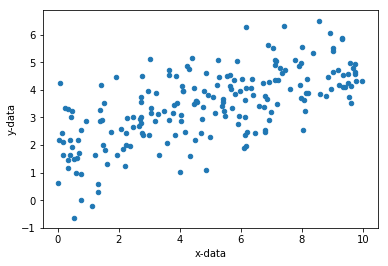

In [94]:
df_data.sample(n=200).plot(kind='scatter',x='x-data', y='y-data')

In [95]:
batch_size=8

#Generate 2 random values to start as m and b
m=tf.Variable(0,dtype=tf.float32,name='m');
b=tf.Variable(0,dtype=tf.float32,name='b');

x_pl=tf.placeholder(tf.float32,[batch_size])
y_pl=tf.placeholder(tf.float32,[batch_size])

In [96]:
y_model=m*x_pl+b

In [105]:
error=tf.reduce_mean(tf.square(y_pl-y_model))

In [106]:
train = tf.train.GradientDescentOptimizer(0.001).minimize(error)
init = tf.global_variables_initializer()

In [113]:
with tf.Session() as sess:
    sess.run(init)
    
    epoch = 10000
    for i in range(epoch):
        batch_index=np.random.randint(len(x_data),size=batch_size)
        sess.run(train, feed_dict={x_pl:x_data[batch_index],y_pl:y_true[batch_index]})
    model_m,model_b = sess.run([m,b])

In [116]:
model_m

0.30509603

In [117]:
model_b

1.9971939

In [118]:
y_hat=model_m*x_data+model_b

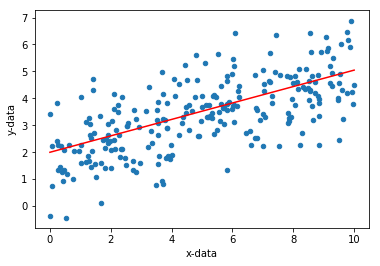

In [119]:
df_data.sample(250).plot(kind='scatter',x='x-data',y='y-data')
plot.plot(x_data,y_hat,'r')